In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
from sklearn.ensemble import IsolationForest


In [34]:
df = pd.read_csv('adult_with_headers.csv')

In [35]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## The dataset consists of various columns 14 independent features giving information about people and a target column income ##
## the independent columns give information about their socioeconomic status which may or may not affect their income##

In [37]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## There are no null values ##

In [39]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [40]:
df['workclass'].nunique()

9

In [41]:
df['education'].nunique()

16

In [42]:
df['marital_status'].nunique()

7

In [43]:
df['occupation'].nunique()

15

In [44]:
df['relationship'].nunique()

6

In [45]:
df['race'].nunique()

5

In [46]:
df['sex'].nunique()

2

In [47]:
df['native_country'].nunique()

42

In [48]:
df['income'].nunique()

2

In [49]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

## sex column has only two unique values therfore we can apply one hot encoding to this column ##

In [51]:
df = pd.get_dummies(data=df,columns= ['sex'], dtype=int)

In [52]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,<=50K,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,<=50K,0,1


## All the other categorical columns have more than 5 unique values therefore we can apply Label encoding to these columns ##

In [54]:
# Columns to label encode
columns_to_encode = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country','income']

# Apply LabelEncoder to the specified columns
le = LabelEncoder()
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [55]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,0,1
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,0,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,0,1
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,0,1
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,1,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,0,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,1,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,0,1


In [56]:
income_col = df.pop('income')
df['income'] = income_col
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,0


In [57]:
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
sex_ Female       int32
sex_ Male         int32
income            int32
dtype: object

## one hot encoding creates as many new columns as the number of unique values in a categorical column ##
## however label encoding does not create new columns but assigns unique numerical values to each row in a categorical column ##
## if the number of columns increases after a certain number, it affects the performance of the model. "CURSE OF DIMENSIONALITY"##

In [59]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,1077.648844,87.303830,40.437456,36.718866,0.330795,0.669205,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,7385.292085,402.960219,12.347429,7.823782,0.470506,0.470506,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,40.000000,39.000000,0.000000,0.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,0.000000,0.000000,40.000000,39.000000,0.000000,1.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,0.000000,0.000000,45.000000,39.000000,1.000000,1.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000,1.000000,1.000000


In [60]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200

<Axes: >

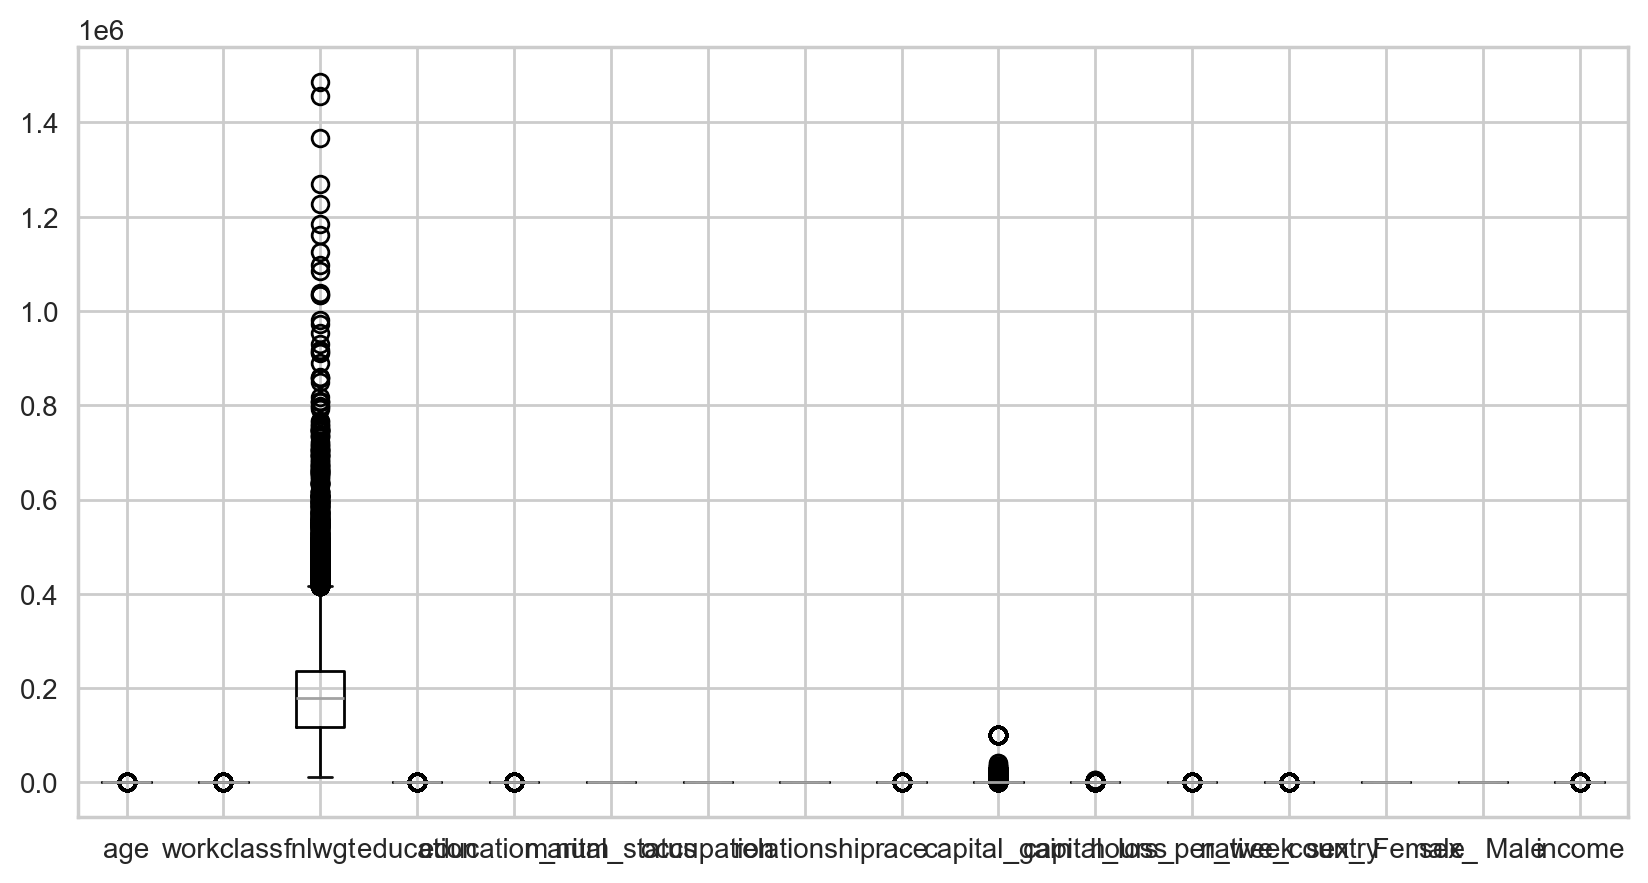

In [61]:
df.boxplot()

In [62]:
x = df.iloc[:,:-1]
y = df['income']

In [63]:
mn = MinMaxScaler()

In [64]:
x = mn.fit_transform(x)
x

array([[0.30136986, 0.875     , 0.0443019 , ..., 0.95121951, 0.        ,
        1.        ],
       [0.45205479, 0.75      , 0.0482376 , ..., 0.95121951, 0.        ,
        1.        ],
       [0.28767123, 0.5       , 0.13811345, ..., 0.95121951, 0.        ,
        1.        ],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 0.95121951, 1.        ,
        0.        ],
       [0.06849315, 0.5       , 0.12849934, ..., 0.95121951, 0.        ,
        1.        ],
       [0.47945205, 0.625     , 0.18720338, ..., 0.95121951, 1.        ,
        0.        ]])

In [65]:
sc = StandardScaler()

In [66]:
x = sc.fit_transform(x)
x

array([[ 0.03067056,  2.15057856, -1.06361075, ...,  0.29156857,
        -0.70307135,  0.70307135],
       [ 0.83710898,  1.46373585, -1.008707  , ...,  0.29156857,
        -0.70307135,  0.70307135],
       [-0.04264203,  0.09005041,  0.2450785 , ...,  0.29156857,
        -0.70307135,  0.70307135],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ...,  0.29156857,
         1.42233076, -1.42233076],
       [-1.21564337,  0.09005041,  0.11095988, ...,  0.29156857,
        -0.70307135,  0.70307135],
       [ 0.98373415,  0.77689313,  0.92989258, ...,  0.29156857,
         1.42233076, -1.42233076]])

## Feature Engineering ##

In [68]:
x = df.iloc[:,:-1]
y = df['income']

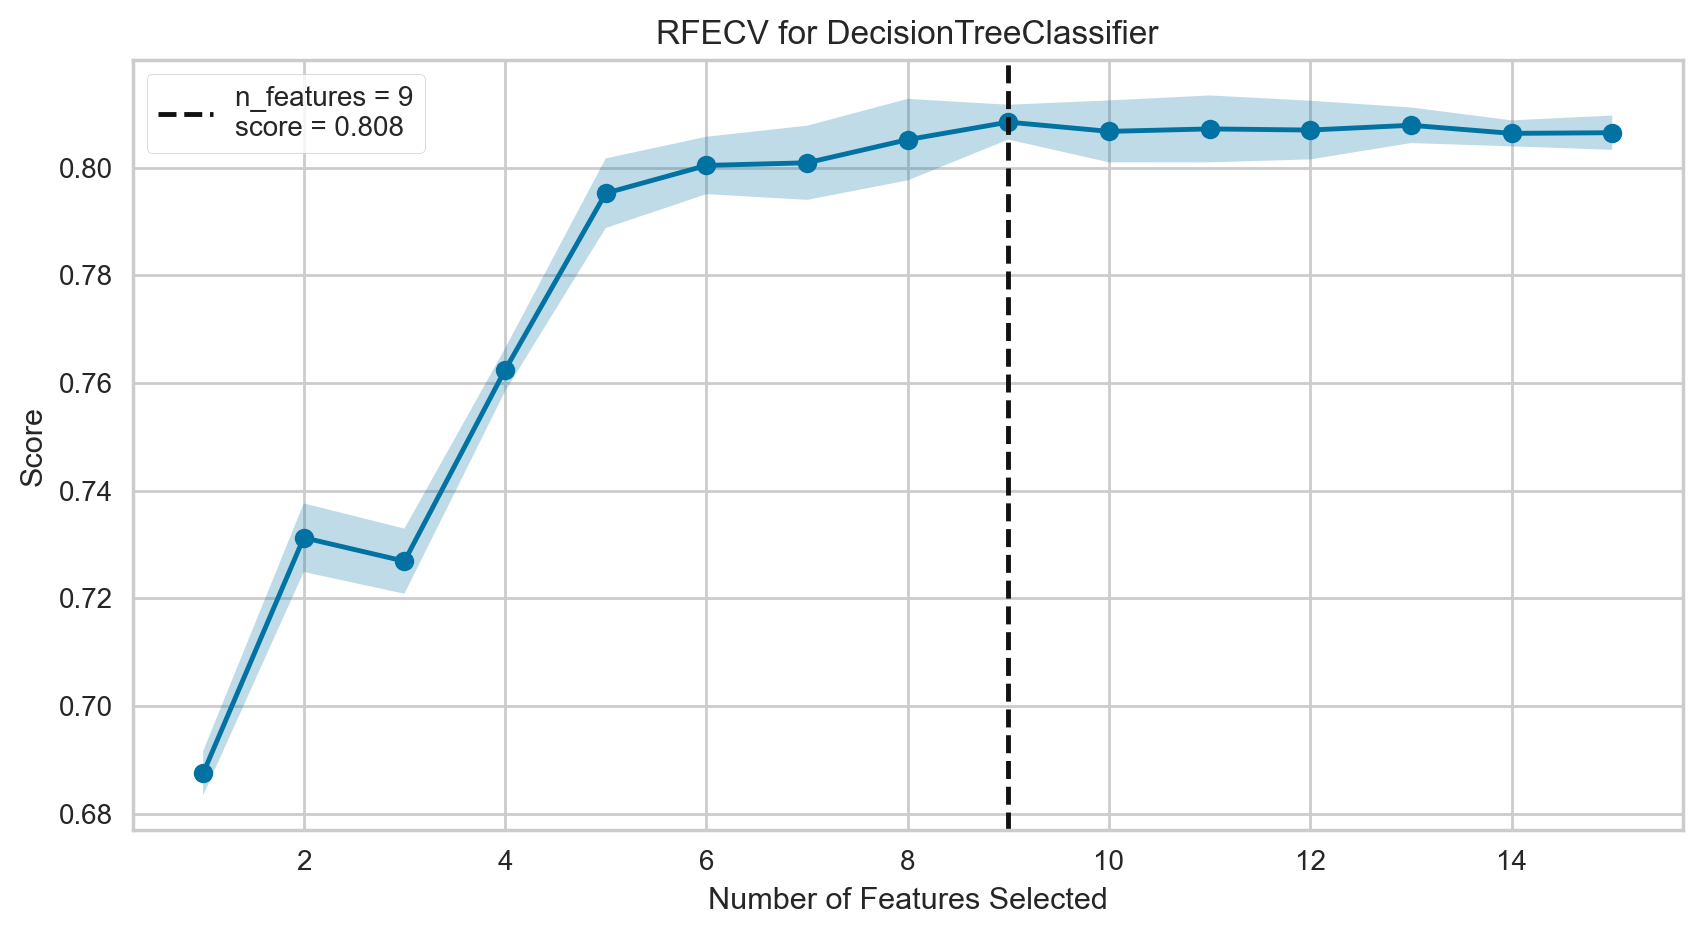

In [69]:
rfe = rfecv(DecisionTreeClassifier(),x,y)

In [70]:
rfe.ranking_

array([1, 1, 1, 4, 1, 5, 1, 1, 3, 1, 1, 1, 2, 6, 7])

In [71]:
x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_ Female',
       'sex_ Male'],
      dtype='object')

In [72]:
rfe_Sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})

In [73]:
rfe_Sel

,Ranking,Features
0,1,age
1,1,workclass
2,1,fnlwgt
3,4,education
4,1,education_num
5,5,marital_status
6,1,occupation
7,1,relationship
8,3,race
9,1,capital_gain


In [74]:
rfe_Sel[rfe_Sel['Ranking']==1]

,Ranking,Features
0,1,age
1,1,workclass
2,1,fnlwgt
4,1,education_num
6,1,occupation
7,1,relationship
9,1,capital_gain
10,1,capital_loss
11,1,hours_per_week


## As per above exercise of feature selection through RFECV we can select any two features which have ranking 1 ##
## In my opinion education and occupation are the two most important features. ##
## Education is the base of a persons career growth and earnings and being in the right occupation is also very important. ##
## in my opinion native_country where one lives is the next important feature. ##

## Identifying skewness and applying transformation ##

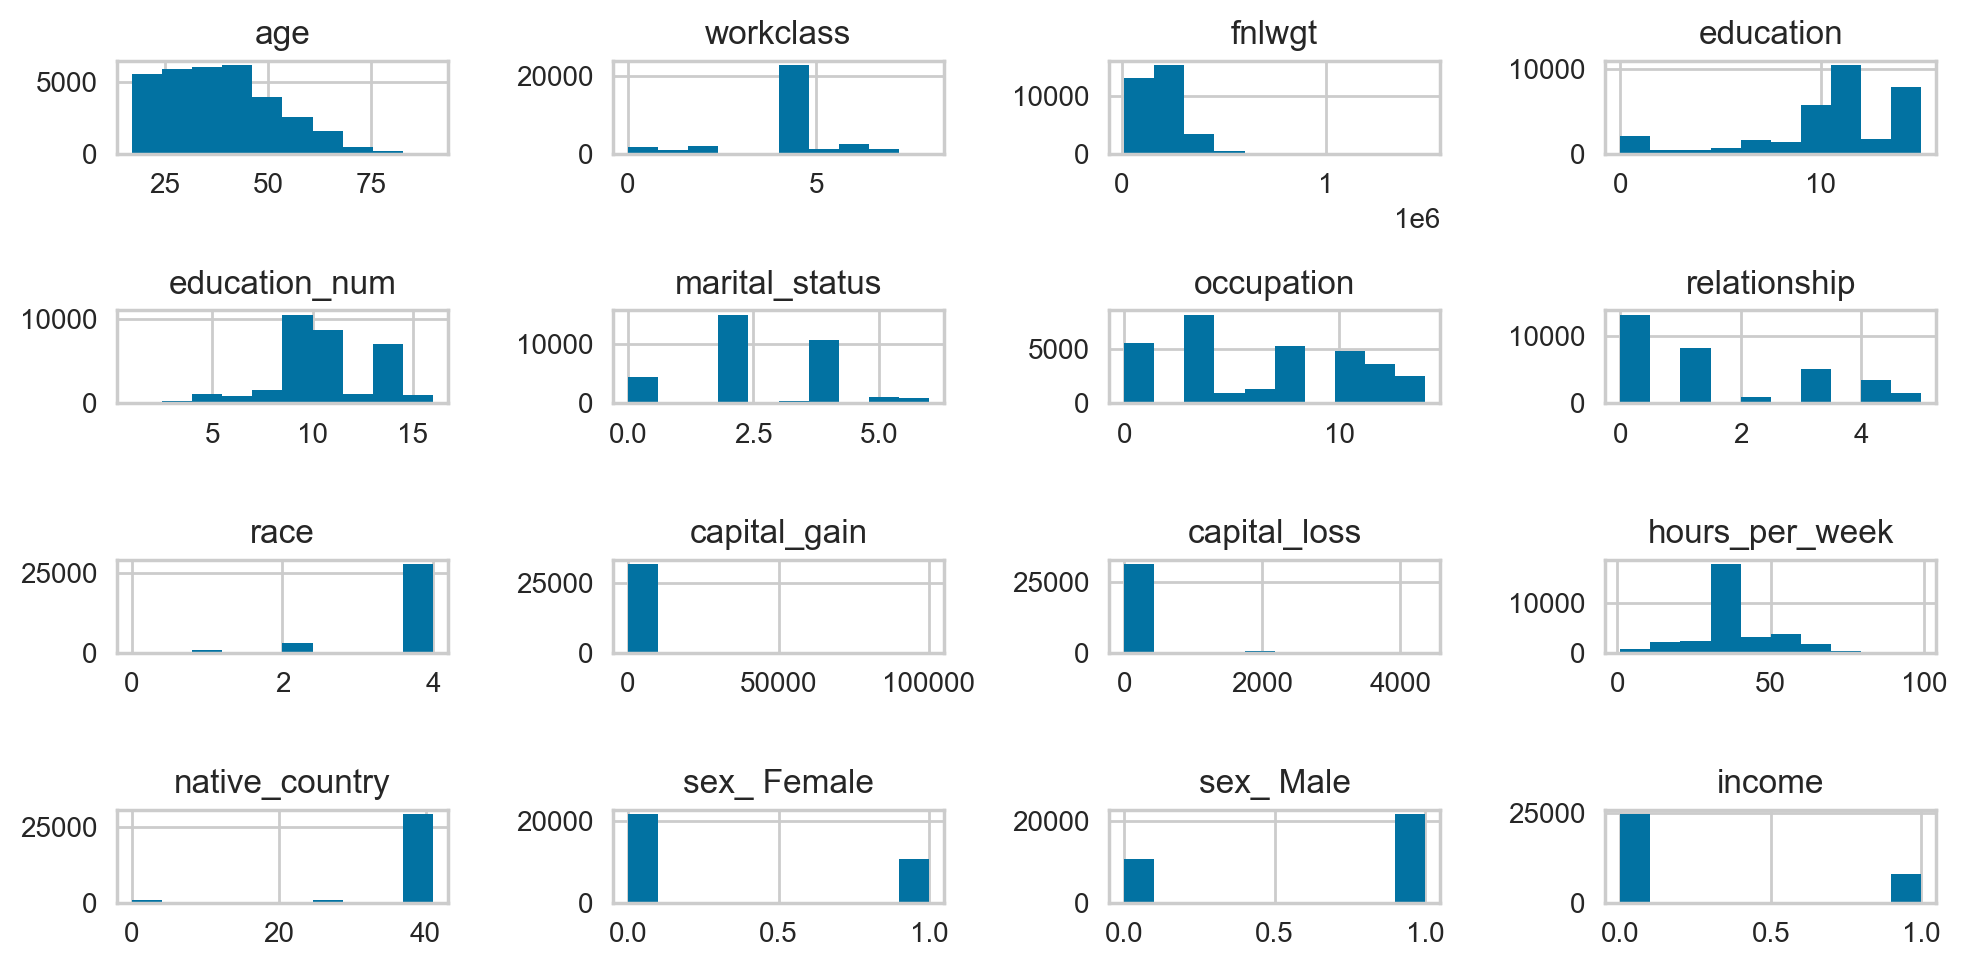

In [77]:
df.hist()
plt.tight_layout()

## We can see that there is negative skewness in the feature education ##

In [79]:
feature = 'education'

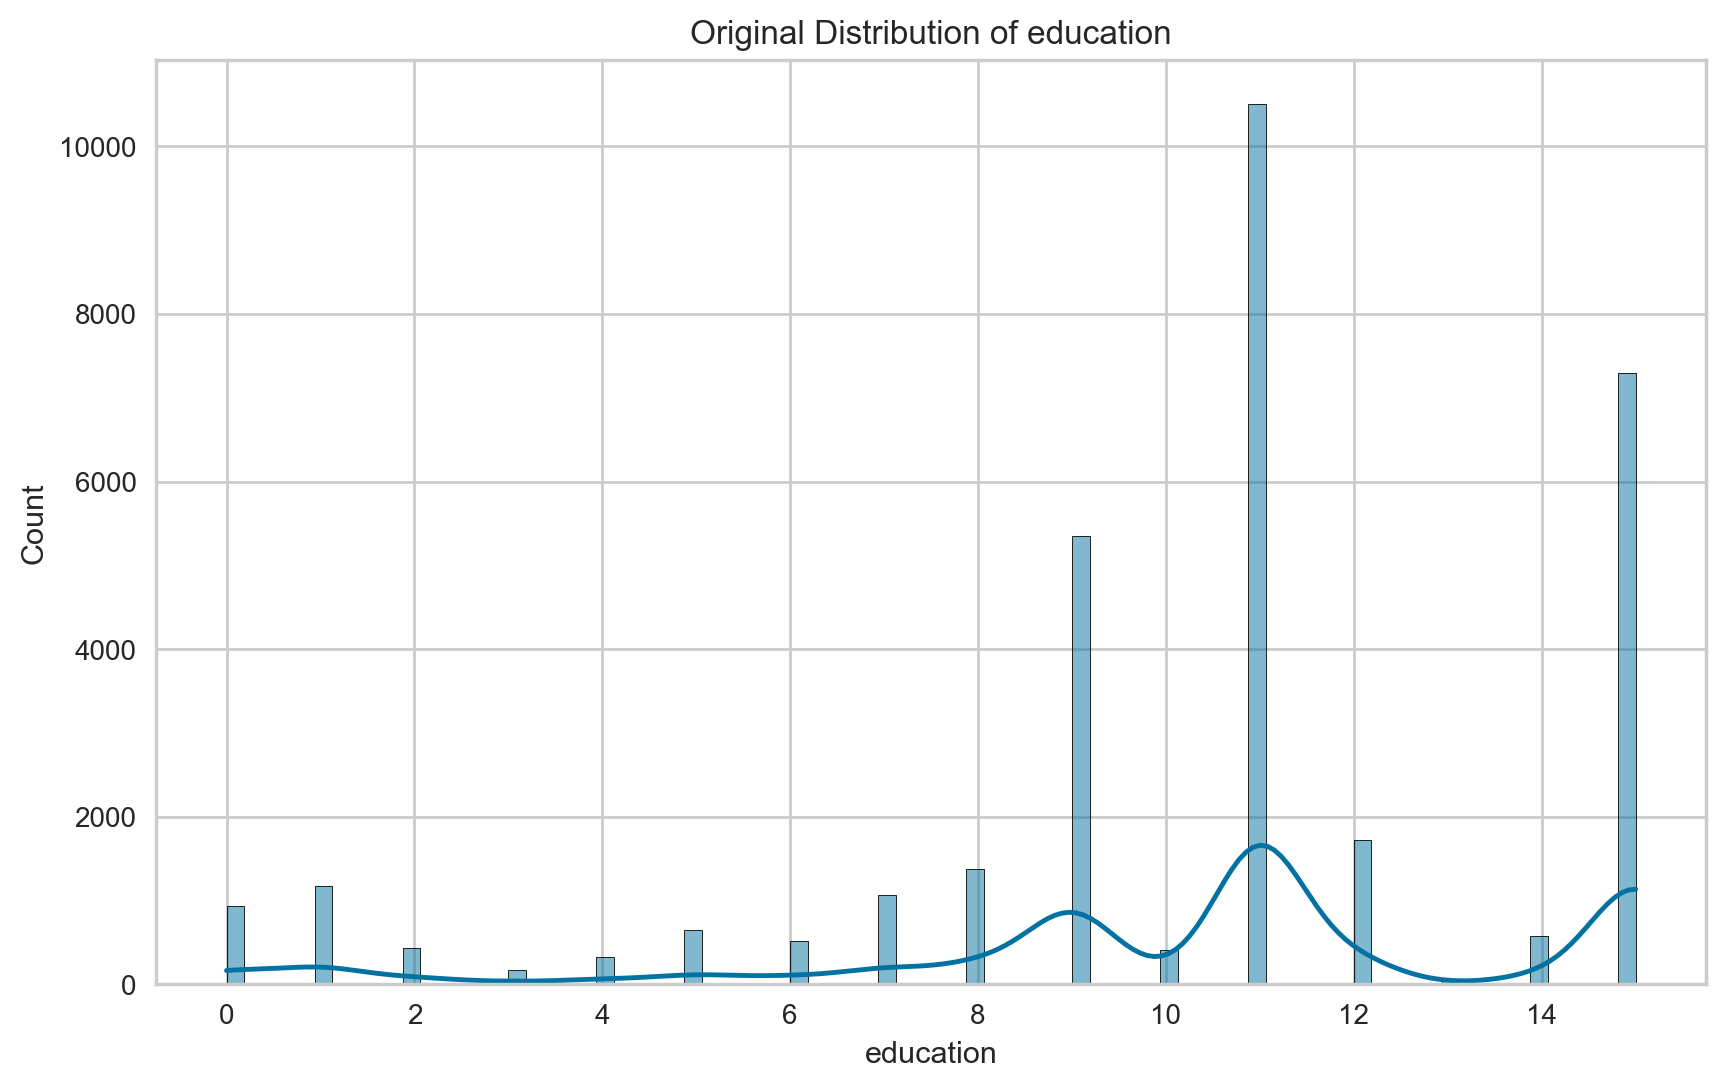

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature], kde=True)
plt.title('Original Distribution of education')
plt.show()

# Apply log transformation ##

In [82]:
df[feature + '_log'] = np.log1p(df[feature])

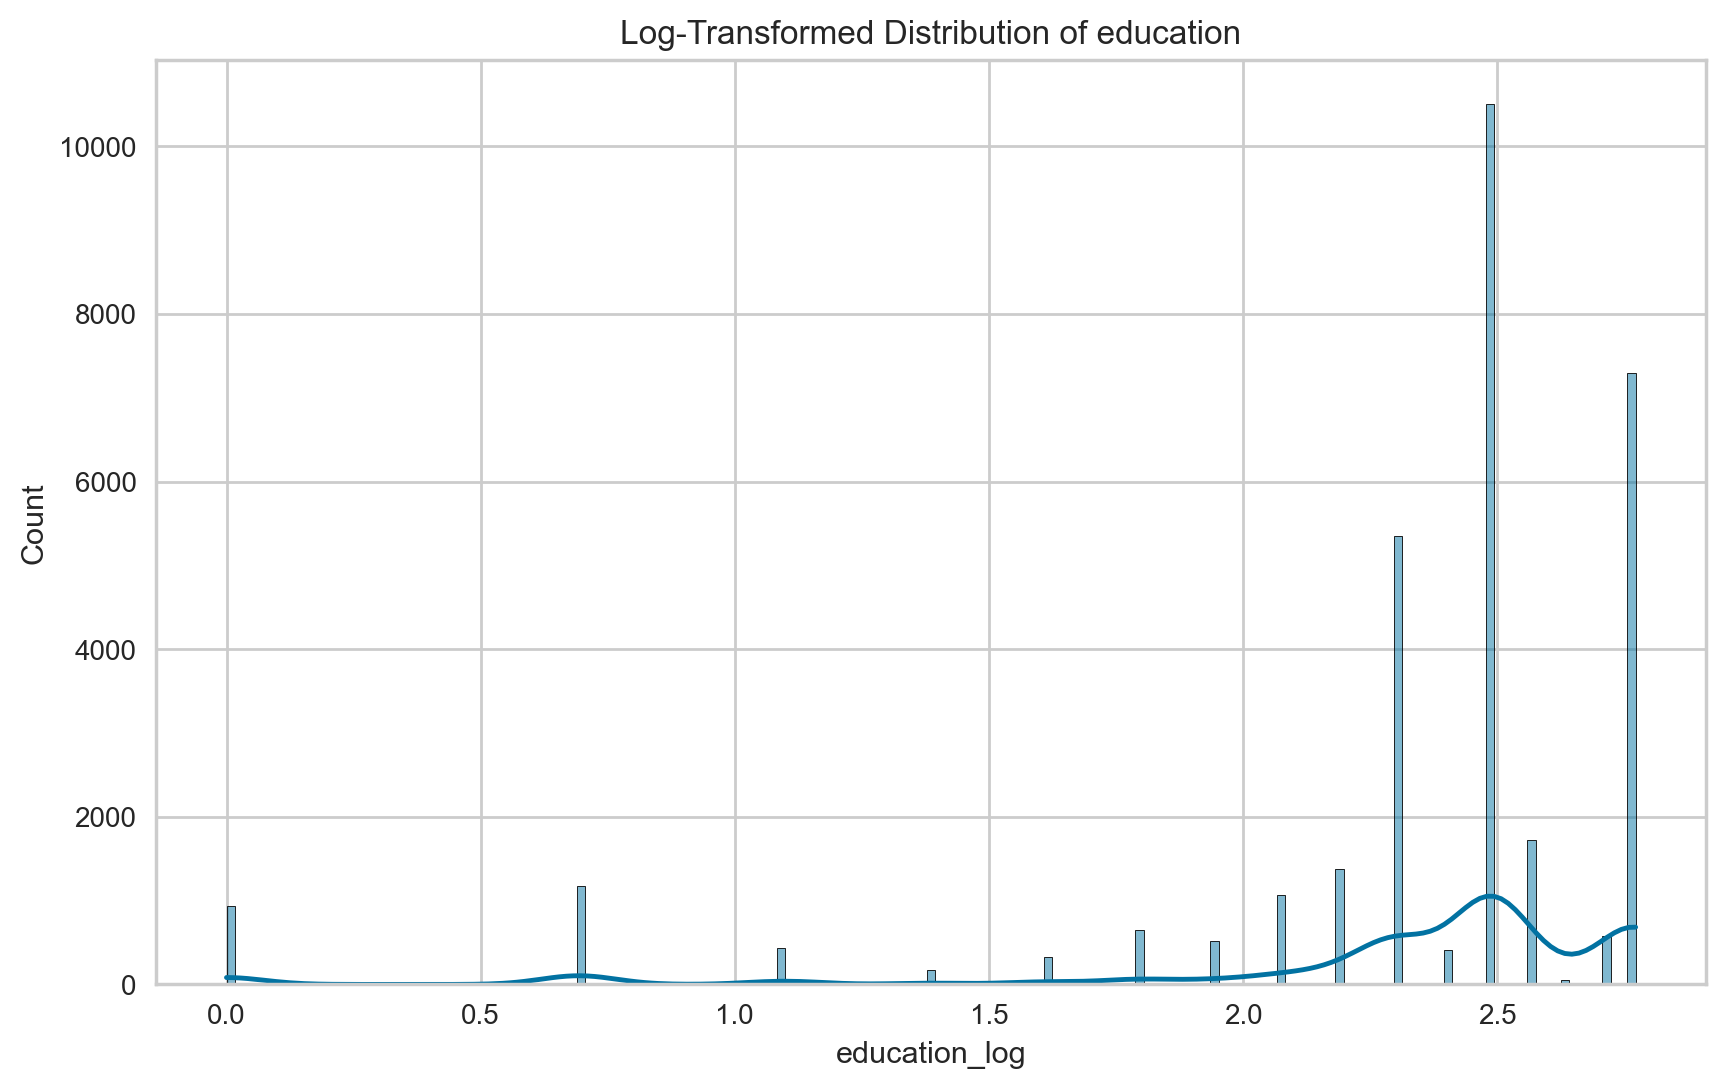

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature + '_log'], kde=True)
plt.title('Log-Transformed Distribution of education')
plt.show()

In [84]:
print(f"Skewness of original {feature}: {df[feature].skew()}")
print(f"Skewness of log-transformed {feature}: {df[feature + '_log'].skew()}")

Skewness of original education: -0.9340424374279611
Skewness of log-transformed education: -2.4852725816473296


## Feature Selection ##

In [86]:
iso = IsolationForest()

iso.fit(df)
ypred = iso.predict(df)
ypred

array([ 1,  1,  1, ...,  1,  1, -1])

In [87]:
df['Outliers'] = ypred
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income,education_log,Outliers
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,0,2.302585,1
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,0,2.302585,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,0,2.484907,1
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,0,0.693147,1
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,0,2.302585,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,0,2.079442,1
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,1,2.484907,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,0,2.484907,1
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,0,2.484907,1


## In the Outliers column where the value is -1 are the actual outliers. ##

In [89]:
Outliers = df[df['Outliers'] == -1]

In [90]:
Outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income,education_log,Outliers
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,0,2.302585,-1
6,49,4,160187,6,5,3,8,1,2,0,0,16,23,1,0,0,1.945910,-1
8,31,4,45781,12,14,4,10,1,4,14084,0,50,39,1,0,1,2.564949,-1
11,30,7,141297,9,13,2,10,0,1,0,0,40,19,0,1,1,2.302585,-1
14,40,4,121772,8,11,2,3,0,1,0,0,40,0,0,1,1,2.197225,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,0,287372,10,16,2,0,0,4,0,0,10,39,0,1,1,2.397895,-1
32545,39,2,111499,7,12,2,1,5,4,0,0,20,39,1,0,1,2.079442,-1
32551,32,4,34066,0,6,2,6,0,0,0,0,40,39,0,1,0,0.000000,-1
32553,32,4,116138,12,14,4,13,1,1,0,0,11,36,0,1,0,2.564949,-1


In [91]:
print(f"Number of outliers: {len(Outliers)}")

Number of outliers: 4754


In [92]:
df_cleaned = df[df['Outliers'] == 1]

In [93]:
df_cleaned

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income,education_log,Outliers
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,0,2.302585,1
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,0,2.302585,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,0,2.484907,1
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,0,0.693147,1
5,37,4,284582,12,14,2,4,5,4,0,0,40,39,1,0,0,2.564949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,4,310152,15,10,4,11,1,4,0,0,40,39,0,1,0,2.772589,1
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,0,2.079442,1
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,1,2.484907,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,0,2.484907,1


## The above data is free from outliers as we have selected only the rows where the outlier value is 1 ##

## Effect of outliers on model performance ##
## Reduced Accuracy: Outliers can reduce the overall accuracy of the model. ## 
## The model might struggle to accurately predict both the outliers and the regular observations. ##
## Overfitting: Models may overfit to the outliers, capturing noise instead of the underlying pattern. ##
## This can result in a model that performs well on the training data but poorly on new, unseen data. ##